<a href="https://colab.research.google.com/github/toby766/Stage-E-Quiz/blob/main/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
elect = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
elect

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
elect.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
elect.describe(include = 'all')

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
count,92016,92016.000000,92016.000000,92016.000000,92016.000000
unique,92016,NaN,NaN,NaN,NaN
top,2010-09-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,231.696688,797.623357,6.016163,65.798356
std,NaN,4562.128748,613.520156,2.608116,213.144084
min,NaN,9.900000,-1596.810100,0.000000,-924.820000
25%,NaN,17.300000,417.119800,3.936900,31.543750
50%,NaN,21.900000,856.467925,5.165600,48.715000
75%,NaN,27.600000,1221.293675,8.023300,76.495000


In [6]:
elect["FullDate"] = pd.to_datetime(elect["FullDate"])
elect = elect.set_index("FullDate")

In [7]:
daily_elect = elect.resample('D').sum()

In [8]:
daily_elect

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Text(0, 0.5, 'Electric Price')

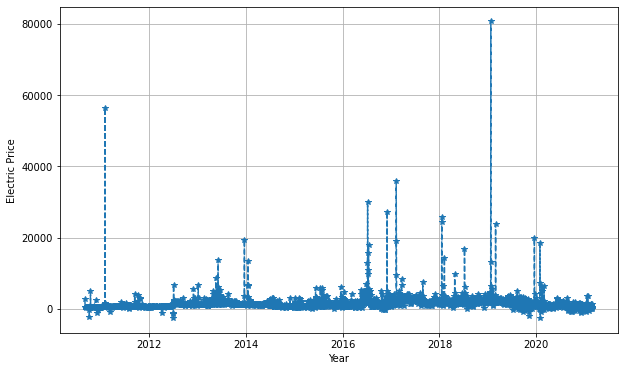

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=( 10 , 6 ))
plt.plot(daily_elect.index, daily_elect['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

In [11]:
from statsmodels.tsa.stattools import adfuller
sys = adfuller(daily_elect['SysLoad'])
gas = adfuller(daily_elect['GasPrice'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
print(f'SysLoad p-value: {round(sys[1],6)}')
print(f'GasPrice p-value: {round(gas[1],6)}')

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


In [14]:
elect_adf = adfuller(daily_elect['ElecPrice'])

In [15]:
print(f'10% Critical Values of GasPrice : {round(gas[4]["10%"],4)}')
print(f'5% Critical Values of ElecPrice : {round(elect_adf[4]["5%"],4)}')

10% Critical Values of GasPrice : -2.5672
5% Critical Values of ElecPrice : -2.8623


In [16]:
train = daily_elect[:2757]
test = daily_elect[2757:]

In [17]:
train.shape

(2757, 4)

In [18]:
test.shape

(1077, 4)

In [19]:
train.reset_index(inplace = True)
train

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [20]:
train_new = train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_new = train_new[['ds', 'y']]
train_new.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [21]:
test_new = test.reset_index()
test_new = test_new.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_new = test_new[['ds', 'y']]
test_new.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [22]:
from fbprophet import Prophet
model = Prophet()
model.fit(train_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
forecast = model.predict(test_new) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,11.741193,4941.424041,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,306.231006,5197.334883,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,468.484500,4962.040391,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,132.001899,4910.830365,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,113.291473,4655.749030,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [61]:
def MAPE(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [34]:
MAPE = MAPE(test_new['y'],forecast['yhat'])
print(f'MAPE: {round(MAPE,2)}')

MAPE: 549.48


In [36]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(test_new['y'],forecast['yhat']))
print(f'RMSE: {round(RMSE,4)}')

RMSE: 3218.1558


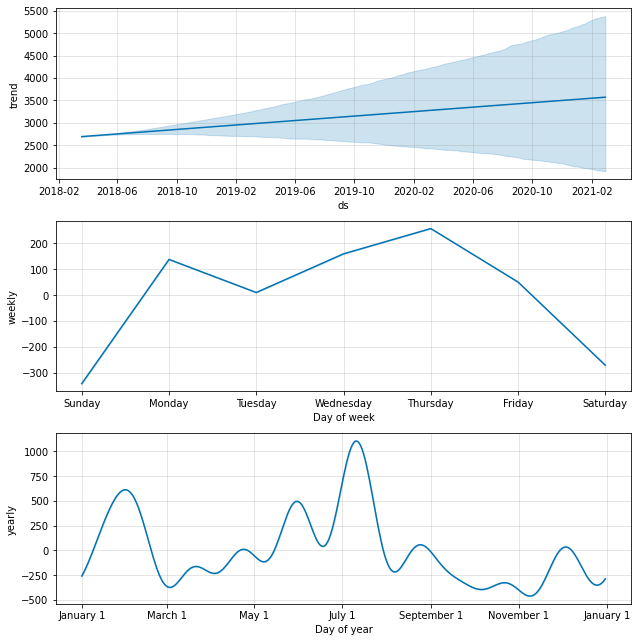

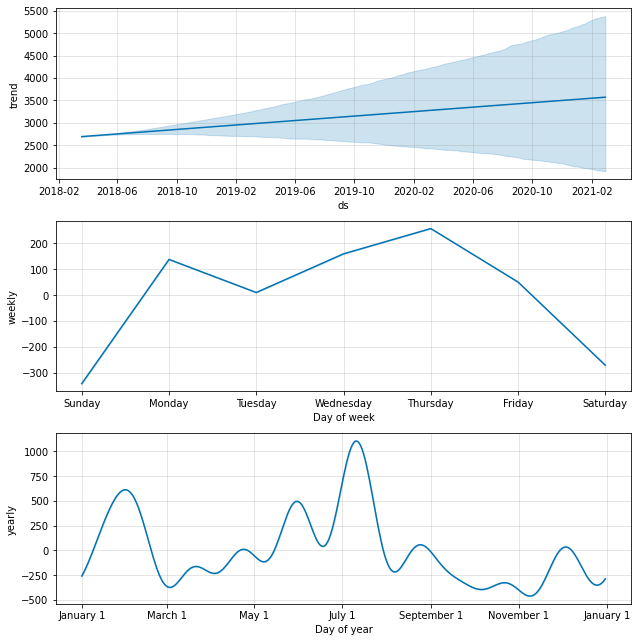

In [37]:
model.plot_components(forecast)

In [38]:
daily_elect.reset_index(inplace=True)
daily_elect1 = daily_elect.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})
daily_elect1.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [39]:
train1 = daily_elect1[:2757]
test1 = daily_elect1[2757:]

In [40]:
train1.shape

(2757, 5)

In [42]:
test1.shape

(1077, 5)

In [43]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [44]:
model = model.fit(train1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
forecast1 = model.predict(test1)

In [49]:
MAPE = MAPE(test1['y'],forecast1['yhat'])
print(f'MAPE:{round(MAPE,2)}')

MAPE:233.74


In [50]:
RMSE = np.sqrt(metrics.mean_squared_error(test1['y'],forecast1['yhat']))
print(f'RMSE: {round(RMSE,2)}')

RMSE: 2709.65


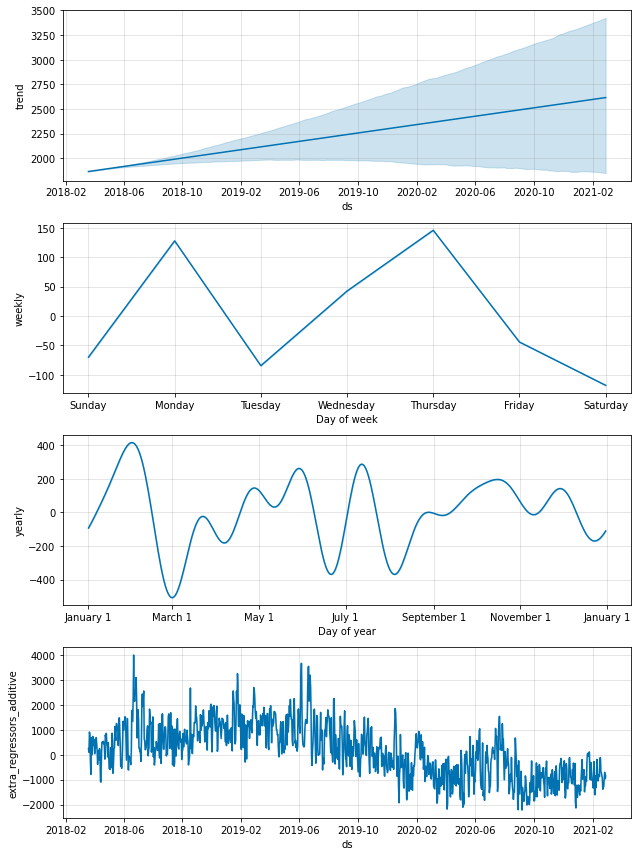

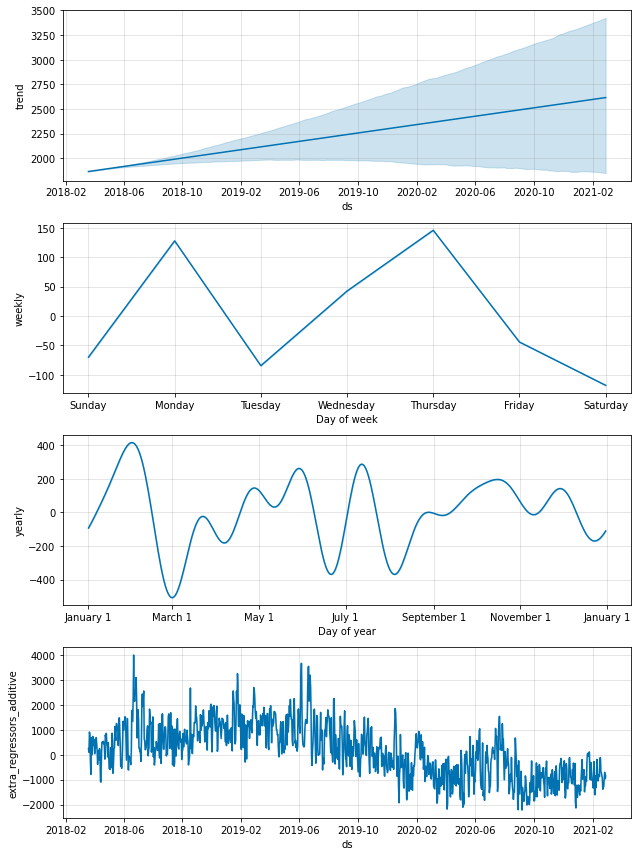

In [51]:
model.plot_components(forecast1)

In [52]:
train2 = daily_elect[:2757]
test2 = daily_elect[2757:]

In [54]:
train_2 = train2.iloc[:,[0,2,3,4]]
test_2 = test2.iloc[:,[0,2,3,4]]

In [55]:
train_2 = train_2.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
test_2 = test_2.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [56]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')

In [57]:
model = model.fit(train_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
forecast2 = model.predict(test_2)

In [62]:
MAPE = MAPE(test_2['y'],forecast2['yhat'])
print(f'MAPE:{round(MAPE,2)}')

MAPE:236.66
